In [1]:
from mpl_toolkits.mplot3d import Axes3D 
from tkinter import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg , NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

from tkinter import filedialog

import matplotlib.pyplot as plt
import numpy as np

In [2]:
mapsize, smooth = 50 , 5
mu, sigma = 0.4 , 0.5

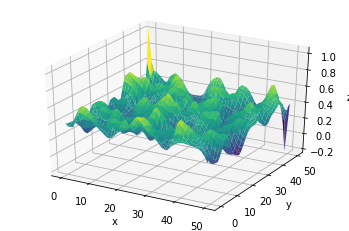

In [5]:
#Functions
###########################################################################################################


def _quit():
    window.quit()
    window.destroy()  
    
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

def smooth3(Z):
    "smooths and returns mesh Z"
     #Smooth corners   
    Z[0,0] = mu
    Z[mapsize-1,0] = mu
    Z[0,mapsize-1] = mu
    Z[mapsize-1,mapsize-1] = mu
    
    #smooth edges of mesh
    for i in range(1,mapsize-2):
        Z[0,i] = (Z[0,i-1]+Z[0,i]+Z[0,i+1] + Z[1,i])/4
        Z[mapsize-1,i] = (Z[mapsize-1,i-1]+Z[mapsize-1,i]+Z[mapsize-1,i+1] + Z[mapsize-2,i])/4 
        Z[i,0] = (Z[i-1,0]+Z[i,0]+Z[i+1,0] + Z[i,1])/4 
        Z[i,mapsize-1] = (Z[i-1,mapsize-1] + Z[i,mapsize-1] + Z[i+1,mapsize-1]+Z[i,mapsize-2])/4
    
    #smooth inner mesh
    for i in range(1,mapsize-1):
        for j in range(1,mapsize-1):
            Z[i,j] = (Z[i,j-1] + 2*Z[i,j] + Z[i,j+1] + Z[i-1,j]+Z[i+1,j])/6
    
    #smooth edges of mesh again
    for i in range(1,mapsize-2):
        Z[0,i] = (Z[0,i-1]+Z[0,i]+Z[0,i+1] + Z[1,i])/4
        Z[mapsize-1,i] = (Z[mapsize-1,i-1]+Z[mapsize-1,i]+Z[mapsize-1,i+1] + Z[mapsize-2,i])/4 
        Z[i,0] = (Z[i-1,0]+Z[i,0]+Z[i+1,0] + Z[i,1])/4 
        Z[i,mapsize-1] = (Z[i-1,mapsize-1] + Z[i,mapsize-1] + Z[i+1,mapsize-1]+Z[i,mapsize-2])/4

        
    return Z


def smooth5(Z):
    "smooths and returns mesh Z"
    #smooth inner mesh
    for i in range(2,mapsize-2):
        for j in range(2,mapsize-2):
            Z[i,j] = (Z[i,j-1] + 4*Z[i,j] + Z[i,j+1] + Z[i-1,j]+Z[i+1,j] + Z[i-1,j-1]+ Z[i-1,j+1]+ Z[i+1,j-1]+ Z[i+1,j-1] + Z[i,j-2] + Z[i,j+2] + Z[i-2,j] +Z[i+2,j] )/16
    #smooth edges of mesh
    for i in range(1,mapsize-2):
        Z[0,i] = (Z[0,i-1]+Z[0,i]+Z[0,i+1] + Z[1,i])/4
        Z[mapsize-1,i] = (Z[mapsize-1,i-1]+Z[mapsize-1,i]+Z[mapsize-1,i+1] + Z[mapsize-2,i])/4 
        Z[i,0] = (Z[i-1,0]+Z[i,0]+Z[i+1,0] + Z[i,1])/4 
        Z[i,mapsize-1] = (Z[i-1,mapsize-1] + Z[i,mapsize-1] + Z[i+1,mapsize-1]+Z[i,mapsize-2])/4
        
    return Z

def saveFile():
    text = ""
    #Add each value to the csv
    for i in range(0,mapsize):
        for j in range(0,mapsize):
            text += str(Z[i,j])
            text += ','
        text+='\n'
        
    #Remove the ,\n at the end
    text = text[:-2]
    
    f = filedialog.asksaveasfile(mode='w', defaultextension=".csv")
    if f is None: 
        return
    f.write(text)
    f.close()


#UI and PLOT
###########################################################################################################

window = Tk()
window.title("Plot")

def plot():
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    ax.set_zlabel('z');
    canvas = FigureCanvasTkAgg(fig, window)
    # toolbarFrame = Frame(window)
    # toolbarFrame.grid(column=0,row = 0)
    # toolbar = NavigationToolbar2Tk(canvas, toolbarFrame)
    canvas.draw()
    canvas.get_tk_widget().grid(column = 0 , row = 1)



    new_button = Button(window,text="New",command = initialize)
    new_button.grid(column = 0 , row =2)
    
    save_button = Button(window,text = "Save",command = saveFile)
    save_button.grid(column = 0 , row =3)
    
    quit_button = Button(window,text = "Quit",command = _quit)
    quit_button.grid(column = 0 , row =4)

    # rotate_button = Button(window,text = "►",command = _quit)
    # rotate_button.grid(column = 1 , row =2)

    window.mainloop()
    
#Create terrain
###########################################################################################################

def initialize():
    global x
    global y 
    global X #x coordinate
    global Y #y coordinate
    global Z #height at a specific x and y coordinate.
    x = np.linspace(0, mapsize, mapsize)
    y = np.linspace(0, mapsize, mapsize)
    X,Y = np.meshgrid(x, y)
    Z = np.random.random((mapsize, mapsize))
    for i in range(0,mapsize):
        for j in range(0,mapsize):
            Z[0,0] = mu
    for i in range(0,mapsize):
        s = np.random.normal(mu,sigma,mapsize)
        Z[i] = s
    
    Z = np.transpose(Z) #rotate 2d array
    for i in range(0,mapsize):
        s = np.random.normal(mu,sigma,mapsize)
        Z[i] = s

    #smooth terrain
    for i in range(smooth):
        Z = smooth3(Z)
        
    plot()
        
    
initialize()